In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer



In [103]:
tweets = pd.read_csv('../data/twitter_api_pulls.csv')
twitter_handles = pd.read_csv('../data/twitter_handles.csv')

In [86]:
followers = pd.read_csv('../data/follower_count.csv')

In [98]:
dao = pd.read_json('../data/boardroom_dao.json', lines=True)
proposals = pd.read_json('../data/dao_proposals.json', lines=True)
tr_bal = pd.read_json('../data/dao_treasury_balance.json', lines=True)
tok_bal = pd.read_json('../data/dao_treasury_token_balance.json', lines=True)
tr_tran = pd.read_json('../data/dao_treasury_transactions.json', lines=True)
vote = pd.read_json('../data/vote.json', lines=True)

In [87]:
temp = []
for i in tweets['tweets']:
    result = re.sub(r'http[^ ]+','', i)
    temp.append(result)

tweets['tweets'] = temp

In [88]:
temp = []
for i in tweets['tweets']:
    result = re.sub(r'amp[^ ]+','', i)
    temp.append(result)

tweets['tweets'] = temp

In [89]:
tokenizer = RegexpTokenizer('\w+')

In [90]:
text_tokenized = [tokenizer.tokenize(i.lower())for i in tweets['tweets']]
tweets['tokenized_text'] = text_tokenized

In [91]:
tweets

,screen_name,tweets,likes,retweets,time,tokenized_text
0,1HiveOrg,1HTV's @vegaypatino shares his perspective on ...,4,1,2022-02-14 18:59:56+00:00,"[1htv, s, vegaypatino, shares, his, perspectiv..."
1,1HiveOrg,RT @1HiveOrg: 1HTV is LIVE! 🐝 📺\n\nJoin us for...,0,4,2022-02-14 17:06:00+00:00,"[rt, 1hiveorg, 1htv, is, live, join, us, for, ..."
2,1HiveOrg,1HTV is LIVE! 🐝 📺\n\nJoin us for DAOspace news...,11,4,2022-02-14 16:00:01+00:00,"[1htv, is, live, join, us, for, daospace, news..."
3,1HiveOrg,1HTV Monday Stream tomorrow at 11am ET! 📺\n\n-...,18,8,2022-02-13 22:09:15+00:00,"[1htv, monday, stream, tomorrow, at, 11am, et,..."
4,1HiveOrg,2 hours left!\n\nOur Gnosis Auction is wrappin...,10,3,2022-02-11 21:10:00+00:00,"[2, hours, left, our, gnosis, auction, is, wra..."
...,...,...,...,...,...,...
34419,MakerDao,RT @LeagueKingdoms: We are excited to enable @...,0,8,2021-01-11 19:13:17+00:00,"[rt, leaguekingdoms, we, are, excited, to, ena..."
34420,MakerDao,📈Increase the System Surplus Buffer from 4M to...,19,4,2021-01-11 17:10:38+00:00,"[increase, the, system, surplus, buffer, from,..."
34421,MakerDao,🪙Signal support for/against onboarding UNI-V2-...,18,3,2021-01-11 17:10:34+00:00,"[signal, support, for, against, onboarding, un..."
34422,MakerDao,👷‍♂️Onboarding JuanJuan to the Operational Sup...,8,1,2021-01-11 17:10:33+00:00,"[onboarding, juanjuan, to, the, operational, s..."


In [92]:
def join_vect(df, col):
    joined = []
    for i in df[f'{col}']:
        joined.append(" ". join(i))
    df[f'joined_{col}'] = joined
    return df

In [93]:
join_vect(tweets, 'tokenized_text')

,screen_name,tweets,likes,retweets,time,tokenized_text,joined_tokenized_text
0,1HiveOrg,1HTV's @vegaypatino shares his perspective on ...,4,1,2022-02-14 18:59:56+00:00,"[1htv, s, vegaypatino, shares, his, perspectiv...",1htv s vegaypatino shares his perspective on f...
1,1HiveOrg,RT @1HiveOrg: 1HTV is LIVE! 🐝 📺\n\nJoin us for...,0,4,2022-02-14 17:06:00+00:00,"[rt, 1hiveorg, 1htv, is, live, join, us, for, ...",rt 1hiveorg 1htv is live join us for daospace ...
2,1HiveOrg,1HTV is LIVE! 🐝 📺\n\nJoin us for DAOspace news...,11,4,2022-02-14 16:00:01+00:00,"[1htv, is, live, join, us, for, daospace, news...",1htv is live join us for daospace news a chat ...
3,1HiveOrg,1HTV Monday Stream tomorrow at 11am ET! 📺\n\n-...,18,8,2022-02-13 22:09:15+00:00,"[1htv, monday, stream, tomorrow, at, 11am, et,...",1htv monday stream tomorrow at 11am et daospac...
4,1HiveOrg,2 hours left!\n\nOur Gnosis Auction is wrappin...,10,3,2022-02-11 21:10:00+00:00,"[2, hours, left, our, gnosis, auction, is, wra...",2 hours left our gnosis auction is wrapping up...
...,...,...,...,...,...,...,...
34419,MakerDao,RT @LeagueKingdoms: We are excited to enable @...,0,8,2021-01-11 19:13:17+00:00,"[rt, leaguekingdoms, we, are, excited, to, ena...",rt leaguekingdoms we are excited to enable mak...
34420,MakerDao,📈Increase the System Surplus Buffer from 4M to...,19,4,2021-01-11 17:10:38+00:00,"[increase, the, system, surplus, buffer, from,...",increase the system surplus buffer from 4m to ...
34421,MakerDao,🪙Signal support for/against onboarding UNI-V2-...,18,3,2021-01-11 17:10:34+00:00,"[signal, support, for, against, onboarding, un...",signal support for against onboarding uni v2 w...
34422,MakerDao,👷‍♂️Onboarding JuanJuan to the Operational Sup...,8,1,2021-01-11 17:10:33+00:00,"[onboarding, juanjuan, to, the, operational, s...",onboarding juanjuan to the operational support...


In [94]:
cv = CountVectorizer(stop_words='english')

In [95]:
tweet_vect = cv.fit_transform(tweets['joined_tokenized_text'])
tweet_vect_tt = pd.DataFrame(tweet_vect.todense(), columns=cv.get_feature_names())

<AxesSubplot:>

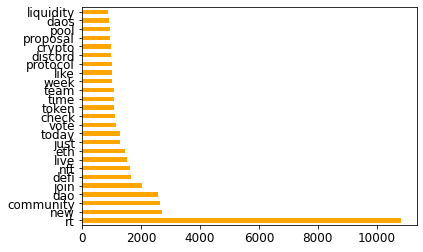

In [110]:
tweet_vect_tt.sum().sort_values(ascending=False).head(25).plot(kind='barh', fontsize=12, color = 'orange')

In [102]:
tweets

,screen_name,tweets,likes,retweets,time,tokenized_text,joined_tokenized_text
0,1HiveOrg,1HTV's @vegaypatino shares his perspective on ...,4,1,2022-02-14 18:59:56+00:00,"[1htv, s, vegaypatino, shares, his, perspectiv...",1htv s vegaypatino shares his perspective on f...
1,1HiveOrg,RT @1HiveOrg: 1HTV is LIVE! 🐝 📺\n\nJoin us for...,0,4,2022-02-14 17:06:00+00:00,"[rt, 1hiveorg, 1htv, is, live, join, us, for, ...",rt 1hiveorg 1htv is live join us for daospace ...
2,1HiveOrg,1HTV is LIVE! 🐝 📺\n\nJoin us for DAOspace news...,11,4,2022-02-14 16:00:01+00:00,"[1htv, is, live, join, us, for, daospace, news...",1htv is live join us for daospace news a chat ...
3,1HiveOrg,1HTV Monday Stream tomorrow at 11am ET! 📺\n\n-...,18,8,2022-02-13 22:09:15+00:00,"[1htv, monday, stream, tomorrow, at, 11am, et,...",1htv monday stream tomorrow at 11am et daospac...
4,1HiveOrg,2 hours left!\n\nOur Gnosis Auction is wrappin...,10,3,2022-02-11 21:10:00+00:00,"[2, hours, left, our, gnosis, auction, is, wra...",2 hours left our gnosis auction is wrapping up...
...,...,...,...,...,...,...,...
34419,MakerDao,RT @LeagueKingdoms: We are excited to enable @...,0,8,2021-01-11 19:13:17+00:00,"[rt, leaguekingdoms, we, are, excited, to, ena...",rt leaguekingdoms we are excited to enable mak...
34420,MakerDao,📈Increase the System Surplus Buffer from 4M to...,19,4,2021-01-11 17:10:38+00:00,"[increase, the, system, surplus, buffer, from,...",increase the system surplus buffer from 4m to ...
34421,MakerDao,🪙Signal support for/against onboarding UNI-V2-...,18,3,2021-01-11 17:10:34+00:00,"[signal, support, for, against, onboarding, un...",signal support for against onboarding uni v2 w...
34422,MakerDao,👷‍♂️Onboarding JuanJuan to the Operational Sup...,8,1,2021-01-11 17:10:33+00:00,"[onboarding, juanjuan, to, the, operational, s...",onboarding juanjuan to the operational support...


In [100]:
followers

,screen_name,follower_count
0,1HiveOrg,6665
1,1inch,1015150
2,1UP,62175
3,AaveAave,428464
4,aavegotchi,92203
...,...,...
191,xdaoapp,6174
192,YamFinance,25296
193,iearnfinance,182864
194,yfBeta,1630


In [104]:
twitter_handles

,name,twitter_handle,twitter_url
0,1HiveLLC,1HiveOrg,https://twitter.com/1HiveOrg
1,1inch,1inch,https://twitter.com/1inch
2,1UP,1UP,https://twitter.com/1UP
3,Aave,AaveAave,https://twitter.com/AaveAave
4,Aavegotchi,aavegotchi,https://twitter.com/aavegotchi
...,...,...,...
191,XDAO,xdaoapp,https://twitter.com/xdaoapp
192,Yam Finance,YamFinance,https://twitter.com/YamFinance
193,Yearn Finance,iearnfinance,https://twitter.com/iearnfinance
194,yfBeta,yfBeta,https://twitter.com/yfBeta


In [101]:
dao

,cname,name,categories,totalProposals,totalVotes,uniqueVoters,icons,tokens,type
0,1inch,1inch,['Protocol'],3,214,175,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': '1inch', 'ne...",DAO
1,aave,Aave,['Protocol'],58,1790,890,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'aave', 'net...",DAO
2,aavegotchi,Aavegotchi,['Protocol'],246,77452,6512,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'ghst', 'net...",DAO
3,alchemist,Alchemist,['Service'],24,521,301,"[{'adapter': 'default', 'size': 'small', 'url'...","[{'adapter': 'default', 'symbol': 'mist', 'net...",DAO
4,alchemixfinance,Alchemix Finance,['Uncategorized'],40,6666,1715,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'alcx', 'net...",DAO
...,...,...,...,...,...,...,...,...,...
98,wgmi,WGMI,['Uncategorized'],1,1,1,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'wgmi', 'net...",DAO
99,yam,Yam,['Product'],114,13272,3861,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'YAMv2', 'ne...",DAO
100,ybaby,Yearn,['Protocol'],24,6839,4382,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'yfi', 'netw...",DAO
101,yfbeta,yfBeta,['Protocol'],14,708,324,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'yfbeta', 'n...",DAO


In [105]:
tr_tran

,protocol,address,chainId,txnHash,value,fromAddress,toAddress,gasSpent,blockHeight,timestamp
0,1inch,0x7951c7ef839e26f63da87a42c9a87986507f1c07,1,0xb6c66c8f1fdf944f6302a345c8d3958f2f174140cac4...,0.000000e+00,0xa3bf91a131fccfecc43999c9ff4612a25a572859,0xdd9f24efc84d93deef3c8745c837ab63e80abd27,61128,13993203,2022-01-12 21:39:37.521
1,1inch,0x7951c7ef839e26f63da87a42c9a87986507f1c07,1,0xad79360f5e38edb1175df34022b24b4d5f64edfe5c49...,0.000000e+00,0xa3bf91a131fccfecc43999c9ff4612a25a572859,0xdd9f24efc84d93deef3c8745c837ab63e80abd27,252990,13992869,2022-01-12 20:26:05.094
2,1inch,0x7951c7ef839e26f63da87a42c9a87986507f1c07,1,0xb7ffd554de7b2b329f21055a958479b17aa6d7a46b33...,0.000000e+00,0xa3bf91a131fccfecc43999c9ff4612a25a572859,0xdd9f24efc84d93deef3c8745c837ab63e80abd27,261108,13992469,2022-01-12 19:06:06.779
3,1inch,0x7951c7ef839e26f63da87a42c9a87986507f1c07,1,0xde7e0f4da03ae1462d46e0b6e1a5d0c4ef866bfd29e3...,0.000000e+00,0xa3bf91a131fccfecc43999c9ff4612a25a572859,0xdd9f24efc84d93deef3c8745c837ab63e80abd27,228754,13992428,2022-01-12 18:49:00.777
4,1inch,0x7951c7ef839e26f63da87a42c9a87986507f1c07,1,0xda0ff6d5e480d4d629662180a9d0d4c4ae86281e8f0d...,0.000000e+00,0xa3bf91a131fccfecc43999c9ff4612a25a572859,0xdd9f24efc84d93deef3c8745c837ab63e80abd27,272837,13992431,2022-01-12 18:49:00.777
...,...,...,...,...,...,...,...,...,...,...
1319,yup,0xbd5224f66d5ce49a8afefc14a76248d158d14c6f,1,0x80ebb6a1ab581ec58fc363edde36a4fd1b6522799717...,0.000000e+00,0x30e838d51c61811d382962b4e0699715462dcde1,0x622236bb180256b6ae1a935dae08dc0356141632,51649,13059204,2021-11-19 21:16:24.567
1320,yup,0xbd5224f66d5ce49a8afefc14a76248d158d14c6f,1,0x6cdd7776ed3ab33d0320dca33454fb1a39bf150a7e9a...,0.000000e+00,0xd74b126baead23a1160494dd8bca94a1081b150f,0x69bbc3f8787d573f1bbdd0a5f40c7ba0aee9bcc9,61407,12595438,2021-11-19 21:16:24.567
1321,yup,0xbd5224f66d5ce49a8afefc14a76248d158d14c6f,1,0x62025491fff88a0887d78b9b565f29219fd4c64efa8a...,0.000000e+00,0xb2d00dd3f9e36a32d1fefba356485f5e651ee05b,0xbd5224f66d5ce49a8afefc14a76248d158d14c6f,186094,12596595,2021-11-19 21:16:24.567
1322,yup,0xbd5224f66d5ce49a8afefc14a76248d158d14c6f,1,0x2021ee313db72bd79c58da555c7b7844a530fad89f2a...,1.000000e+17,0xd74b126baead23a1160494dd8bca94a1081b150f,0xbd5224f66d5ce49a8afefc14a76248d158d14c6f,25918,12595551,2021-11-19 21:16:24.567


In [108]:
vote

,refId,proposalRefId,protocol,adapter,proposalId,address,power,choice,time,timestamp
0,dm90ZToxaW5jaDpkZWZhdWx0OjB4NWYwZDYyOWJjNTM0ND...,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,1inch,default,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,0x44Fb085ffF4b0354b4ccEDf2cc2b648caE938d3C,1.447500e+07,0,{'timestamp': 1643648548},2022-01-31 17:02:28
1,dm90ZToxaW5jaDpkZWZhdWx0OjB4NWYwZDYyOWJjNTM0ND...,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,1inch,default,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,0x4Dc06c025Cb97d6Dc4A17183187e28D297B83C7B,7.500000e+06,0,{'timestamp': 1643670044},2022-01-31 23:00:44
2,dm90ZToxaW5jaDpkZWZhdWx0OjB4NWYwZDYyOWJjNTM0ND...,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,1inch,default,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,0x46EEA8D5b37D2Db51f35c1bC8C50CBf80fb0fFE5,5.250000e+06,0,{'timestamp': 1643659354},2022-01-31 20:02:34
3,dm90ZToxaW5jaDpkZWZhdWx0OjB4NWYwZDYyOWJjNTM0ND...,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,1inch,default,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,0x92c8029165c2aCA6928550A5FecD17c90b448Fa9,3.000000e+06,0,{'timestamp': 1644236118},2022-02-07 12:15:18
4,dm90ZToxaW5jaDpkZWZhdWx0OjB4NWYwZDYyOWJjNTM0ND...,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,1inch,default,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,0x598Dbe6738E0AcA4eAbc22feD2Ac737dbd13Fb8F,1.125000e+06,0,{'timestamp': 1643735761},2022-02-01 17:16:01
...,...,...,...,...,...,...,...,...,...,...
19390,dm90ZTp5dXA6ZGVmYXVsdDpxbWVhaXo5aW00cmh4N3J6bT...,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6cW1lYWl6OWltNHJoeD...,yup,default,QmeaiZ9iM4RhX7rZM7sWcbAombUxBX2rdHeVvLf5Qp91Bp,0x30E838D51c61811d382962B4e0699715462DcdE1,1.300000e+01,0,{'timestamp': 1614532468},2021-02-28 17:14:28
19391,dm90ZTp5dXA6ZGVmYXVsdDpxbWVhaXo5aW00cmh4N3J6bT...,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6cW1lYWl6OWltNHJoeD...,yup,default,QmeaiZ9iM4RhX7rZM7sWcbAombUxBX2rdHeVvLf5Qp91Bp,0x99261740d712AbCaeb0E9323239EDF4F4B61D523,9.205962e+00,0,{'timestamp': 1614532516},2021-02-28 17:15:16
19392,dm90ZTp5dXA6ZGVmYXVsdDpxbWVhaXo5aW00cmh4N3J6bT...,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6cW1lYWl6OWltNHJoeD...,yup,default,QmeaiZ9iM4RhX7rZM7sWcbAombUxBX2rdHeVvLf5Qp91Bp,0x599dBF9f989f38d735B7437954402493C899f173,2.000000e+00,0,{'timestamp': 1614432817},2021-02-27 13:33:37
19393,dm90ZTp5dXA6ZGVmYXVsdDpxbWVhaXo5aW00cmh4N3J6bT...,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6cW1lYWl6OWltNHJoeD...,yup,default,QmeaiZ9iM4RhX7rZM7sWcbAombUxBX2rdHeVvLf5Qp91Bp,0x62eD54b8Bfb15D1131275473095044cdfAF80355,0.000000e+00,0,{'timestamp': 1614361399},2021-02-26 17:43:19
